# Reading PROBA-V data from R 
This notebook illustrates how to find locations of PROBA-V data, and reads them using the preinstalled R raster package.
No further processing is carried out.
We use the 'reticulate' R library to access a Python library that supports finding locations of PROBA-V products on the MEP. Reusing this Python library ensures that R users can also benefit from everything that is implemented for Python users.

In [1]:
install.packages("reticulate")

Installing package into '/home/driesj/.rlibs'
(as 'lib' is unspecified)


Load the reticulate library (R-Python bridge) and point it to the Python version that comes preconfigured with all modules.

In [1]:
library(reticulate)
use_python("/opt/rh/python27/root/usr/bin/python")

[1] "/data/users/Private/driesj/watchItGrow"

Use reticulate calls to load our 'catalogclient' library, written in Python.
More information about the catalog service for PROBA-V product lookup can be found here:
https://proba-v-mep.esa.int/documentation/manuals/product-catalog-api
Using the catalog API avoids having to write our own file lookup code.

In [5]:
catalogclient <- import("catalogclient")
cat=catalogclient$catalog$Catalog()
cat$get_producttypes()

[1] "BioPar_ALB_BHV_V1_Tiles"    "BioPar_ALB_DHV_V1_Tiles"   
 [3] "BioPar_BA_V1_Tiles"         "BioPar_DMP_Tiles"          
 [5] "BioPar_FAPAR_V1_Tiles"      "BioPar_FCOVER_V1_Tiles"    
 [7] "BioPar_LAI_V1_Tiles"        "BioPar_NDVI300_V1_Global"  
 [9] "BioPar_BA300_V1_Global"     "BioPar_FCOVER300_V1_Global"
[11] "BioPar_FAPAR300_V1_Global"  "BioPar_LAI300_V1_Global"   
[13] "BioPar_NDVI_V1_Tiles"       "BioPar_NDVI_V2_Tiles"      
[15] "BioPar_NDVI_V2_Global"      "BioPar_SWI"                
[17] "BioPar_SWI10_V3_Global"     "BioPar_TOCR_Tiles"         
[19] "BioPar_VCI_Tiles"           "BioPar_VPI_Tiles"          
[21] "BioPar_WB_V1_Tiles"         "BioPar_WB_V2_Tiles"        
[23] "PROBAV_L3_S1_TOC_1KM"       "PROBAV_L3_S1_TOC_333M"     
[25] "PROBAV_L3_S10_TOC_333M"     "PROBAV_L3_S5_TOC_100M"     
[27] "PROBAV_L3_S1_TOC_100M"      "PROBAV_L3_S10_TOC_1KM"     
[29] "PROBAV_L3_S1_TOA_1KM"       "PROBAV_L3_S1_TOA_333M"     
[31] "PROBAV_L3_S5_TOA_100M"      "PROBAV_L3_S1_TOA_100M"     
[33] "PROBAV_L3_S10_TOA_1KM"      "PROBAV_L3_S10_TOA_333M"    
[35] "PROBAV_L1C"                 "CGS_S2_FAPAR"              
[37] "CGS_S2_NDVI"                "CGS_S2_LAI"                
[39] "CGS_S2_FCOVER"              "CGS_S2_RADIOMETRY"         
[41] "SPOTVEGETATION_L3_S1"       "SPOTVEGETATION_L3_S10"

Use the get_products method to get some information about products in a particular date range and bounding box.

In [41]:
datetime <- import("datetime")
date = datetime$date(2017L, 4L, 20L)
products = cat$get_products('PROBAV_L3_S1_TOC_333M', 
                            fileformat='GEOTIFF', 
                            startdate=date, 
                            enddate=date, 
                            min_lon=0, max_lon=10, min_lat=36, max_lat=53)

str(products[[1]]$files)
str(products[[1]]$producttype)

List of 5
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_NDVI.tif
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_GEOMETRY.tif
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_TIME.tif
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_RADIOMETRY.tif
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_SM.tif
 chr "PROBAV_L3_S1_TOC_333M"


The API call returns metadata as objects, containing file locations for all bands, we can use some plain R code to transform this list in a simple list of NDVI file locations.

In [42]:
ndvi_files = lapply(products,function(p) p$files[lapply(p$files, function(f) f$bands) == "NDVI"][[1]])
str(ndvi_files)

List of 2
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_V101_NDVI.tif
 $ :file:/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y03_20170420_333M_V101_NDVI.tif


Now that we found some files to process, we can do things. In this case, we will simply plot it using standard functionality from the 'raster' library, which is preinstalled.

 chr "/data/MTDA/TIFFDERIVED/PROBAV_L3_S1_TOC_333M/2017/20170420/PROBAV_S1_TOC_20170420_333M_V101/PROBAV_S1_TOC_X18Y02_20170420_333M_"| __truncated__


NOTE: rgdal::checkCRSArgs: no proj_defs.dat in PROJ.4 shared files
NOTE: rgdal::checkCRSArgs: no proj_defs.dat in PROJ.4 shared files
NOTE: rgdal::checkCRSArgs: no proj_defs.dat in PROJ.4 shared files


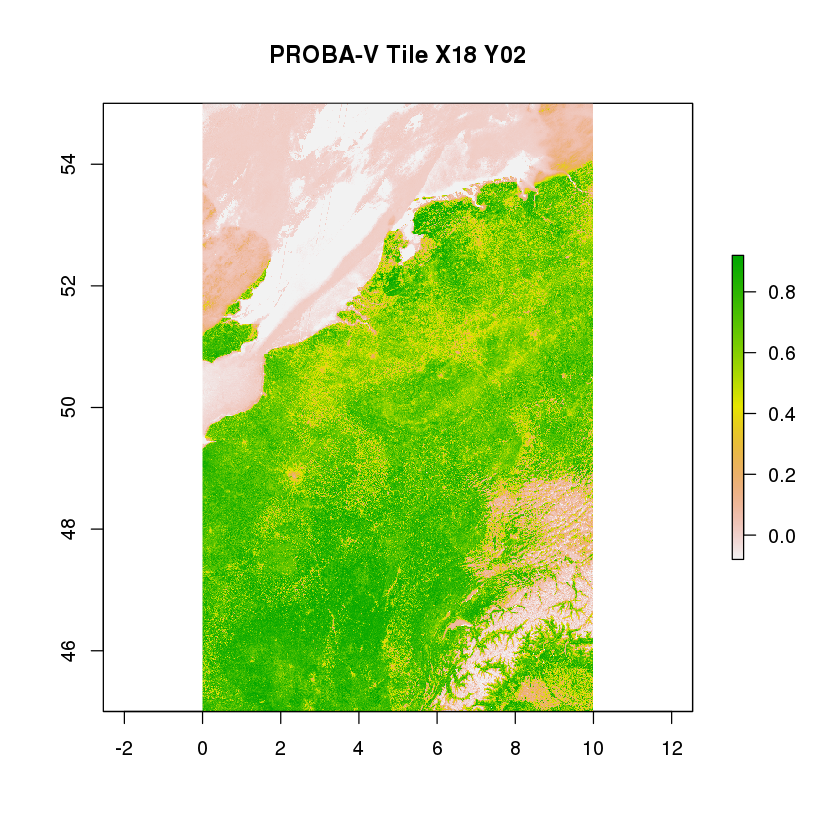

In [43]:
library(raster)
str(substring(ndvi_files[[1]]$filename,6))

r <- raster(substring(ndvi_files[[1]]$filename,6))
plot(r, main='PROBA-V Tile X18 Y02')
